In [1]:
import argparse
import json
import logging
import pickle
import wandb

import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pandas as pd
import os
import numpy as np
import copy
from tqdm.notebook import tqdm, trange

In [2]:
import matplotlib
matplotlib.rcParams.update(
    {
        "figure.dpi": 150,
        "font.size": 14,
    }
)
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

In [3]:
api = wandb.Api(timeout=200)

In [4]:
MT50_ENV_NAMES = [
    "assembly",
    "basketball",
    "bin-picking",
    "box-close",
    "button-press-topdown",
    "button-press-topdown-wall",
    "button-press",
    "button-press-wall",
    "coffee-button",
    "coffee-pull",
    "coffee-push",
    "dial-turn",
    "disassemble",
    "door-close",
    "door-lock",
    "door-open",
    "door-unlock",
    "hand-insert",
    "drawer-close",
    "drawer-open",
    "faucet-open",
    "faucet-close",
    "hammer",
    "handle-press-side",
    "handle-press",
    "handle-pull-side",
    "handle-pull",
    "lever-pull",
    "peg-insert-side",
    "pick-place-wall",
    "pick-out-of-hole",
    "reach",
    "push-back",
    "push",
    "pick-place",
    "plate-slide",
    "plate-slide-side",
    "plate-slide-back",
    "plate-slide-back-side",
    "peg-unplug-side",
    "soccer",
    "stick-push",
    "stick-pull",
    "push-wall",
    "reach-wall",
    "shelf-place",
    "sweep-into",
    "sweep",
    "window-open",
    "window-close",
]

In [5]:
def get_run_interp_key(run, x_key, y_key, x_range):
    x_vals = np.linspace(x_range[0], x_range[1], 1000)
    h = pd.DataFrame(run.scan_history(keys=[x_key, y_key]))
    try:
        if np.max(h[x_key]) < 0.9 * x_range[1]:
            print("Maximum x value of run", str(run), "is", np.max(h[x_key]))
        interp_y = np.interp(x_vals, h[x_key], h[y_key])
        return interp_y
    except KeyError:
        print("Could not get keys in run", run)
    return None

In [9]:
runs_by_algo_base_path_env = {}
x_range = (0, int(5e6))

In [10]:
algo = "fixpo"
group = "xppo-tianshou-metaworld-transfer"
extra_filter = {}
runs = api.runs(
    path="resl-mixppo/stabilized-rl",
    filters={
        "$and": [
            {"group": group},
            {"$not": {"tags": "exclude-from-paper"}},
            {'summary_metrics.global_step': {"$gt": 1 }},
            extra_filter
        ]
    },
)
print(f"Got {len(runs)} runs for group {group}")

Got 84 runs for group xppo-tianshou-metaworld-transfer


In [11]:
for run in tqdm(runs):
    key = (algo, run.config['base_task_path'], run.config['env'])
    success_rate = get_run_interp_key(run, 'global_step', 'test/success_rate', x_range)
    runs_by_algo_base_path_env.setdefault(key, []).append(success_rate)

  0%|          | 0/84 [00:00<?, ?it/s]

Maximum x value of run <Run resl-mixppo/stabilized-rl/ghip7ghf (running)> is 1500000
Maximum x value of run <Run resl-mixppo/stabilized-rl/q2cwi1ev (running)> is 1500000
Maximum x value of run <Run resl-mixppo/stabilized-rl/fv7bnjao (running)> is 1600000
Maximum x value of run <Run resl-mixppo/stabilized-rl/2qx7i9wn (running)> is 2050000
Maximum x value of run <Run resl-mixppo/stabilized-rl/kiwk3wfw (running)> is 2100000
Maximum x value of run <Run resl-mixppo/stabilized-rl/rd9di8wg (running)> is 2100000
Maximum x value of run <Run resl-mixppo/stabilized-rl/t6tlbe9p (running)> is 2450000
Maximum x value of run <Run resl-mixppo/stabilized-rl/98qaijx0 (running)> is 3150000
Maximum x value of run <Run resl-mixppo/stabilized-rl/8i8snwhw (running)> is 3500000
Maximum x value of run <Run resl-mixppo/stabilized-rl/l8zrm305 (running)> is 3550000
Maximum x value of run <Run resl-mixppo/stabilized-rl/kuf4i0xm (running)> is 3650000
Maximum x value of run <Run resl-mixppo/stabilized-rl/5ihco0uz (r

In [12]:
algo = "ppo"
group = "ppo-tianshou-metaworld-transfer"
# extra_filter = {"config.target_coeff": 3, "config.fixup_loop": 1, "config.fixup_every_repeat": 1, "config.eps_kl": 0.5}
extra_filter = {}
runs = api.runs(
    path="resl-mixppo/stabilized-rl",
    filters={
        "$and": [
            {"group": group},
            {"$not": {"tags": "exclude-from-paper"}},
            {'summary_metrics.global_step': {"$gt": 1 }},
            extra_filter
        ]
    },
)
print(f"Got {len(runs)} runs for group {group}")

Got 89 runs for group ppo-tianshou-metaworld-transfer


In [13]:
for run in tqdm(runs):
    key = (algo, run.config['base_task_path'], run.config['env'])
    success_rate = get_run_interp_key(run, 'global_step', 'test/success_rate', x_range)
    runs_by_algo_base_path_env.setdefault(key, []).append(success_rate)

  0%|          | 0/89 [00:00<?, ?it/s]

Maximum x value of run <Run resl-mixppo/stabilized-rl/5h6olv9k (running)> is 1550000
Maximum x value of run <Run resl-mixppo/stabilized-rl/nzcoy0i2 (running)> is 1900000
Maximum x value of run <Run resl-mixppo/stabilized-rl/rc6bocqf (running)> is 1700000
Maximum x value of run <Run resl-mixppo/stabilized-rl/66ipiolf (running)> is 1850000
Maximum x value of run <Run resl-mixppo/stabilized-rl/jrc0z4ee (running)> is 2300000
Maximum x value of run <Run resl-mixppo/stabilized-rl/w257pyft (running)> is 2400000
Maximum x value of run <Run resl-mixppo/stabilized-rl/dlo2pb0y (running)> is 2650000
Maximum x value of run <Run resl-mixppo/stabilized-rl/ftr7hfaa (running)> is 3000000
Maximum x value of run <Run resl-mixppo/stabilized-rl/jm7v5eix (running)> is 3500000
Maximum x value of run <Run resl-mixppo/stabilized-rl/mzz1hhix (running)> is 3200000
Maximum x value of run <Run resl-mixppo/stabilized-rl/ik2m7wr3 (running)> is 3250000
Maximum x value of run <Run resl-mixppo/stabilized-rl/8qmow2dv (r

In [16]:
algo_renames = {
    "kl-proj": "KL Proj.",
    "ppo": "PPO",
    "fixpo": "FixPO",
}

In [18]:
pd_dict_forward = {'Algorithm': [], 'Total Environment Steps': [], 'Success Rate': []}
pd_dict_back = {'Algorithm': [], 'Total Environment Steps': [], 'Success Rate': []}
total_env_steps = np.linspace(x_range[0], x_range[1], 1000)
for (algo, base_task_path, env), runs in runs_by_algo_base_path_env.items():
    a = algo_renames[algo]
    # best_composite = np.max(np.stack([r for r in runs if r is not None]), axis=0)
    if base_task_path == "/home/kr/stabilized-rl/data/xppo_tianshou/env=pick-place_seed=0_step-per-collect=10000_group=xppo-tianshou-metaworld/policy.pth":
        for r in runs:
            pd_dict_forward['Algorithm'].extend([a for _ in range(1000)])
            pd_dict_forward['Total Environment Steps'].extend(total_env_steps)
            pd_dict_forward['Success Rate'].extend(r)
    elif base_task_path == "/home/kr/stabilized-rl/data/ppo_tianshou/env=pick-place_seed=0_step-per-collect=10000_group=ppo-tianshou-metaworld/policy.pth":
        for r in runs:
            pd_dict_forward['Algorithm'].extend([a for _ in range(1000)])
            pd_dict_forward['Total Environment Steps'].extend(total_env_steps)
            pd_dict_forward['Success Rate'].extend(r)
    else:
        for r in runs:
            pd_dict_back['Algorithm'].extend([a for _ in range(1000)])
            pd_dict_back['Total Environment Steps'].extend(total_env_steps)
            pd_dict_back['Success Rate'].extend(r)
    # print(algo, base_task_path)
    # algo_list = [algo for _ in range(1000)]
    # for seed in algo_seeds[algo]:
    #     for env in MT50_ENV_NAMES:
    #         best_composite = np.max(np.stack([res for res in runs_by_algo_seed_env[(algo, seed, env)] if res is not None]), axis=0)
    #         max_over_runs[(algo, seed, env)] = best_composite
    #         pd_dict['algo'].extend(algo_list)
    #         pd_dict['Total Env Steps'].extend(total_env_steps)
    #         pd_dict['Success Rate'].extend(best_composite)

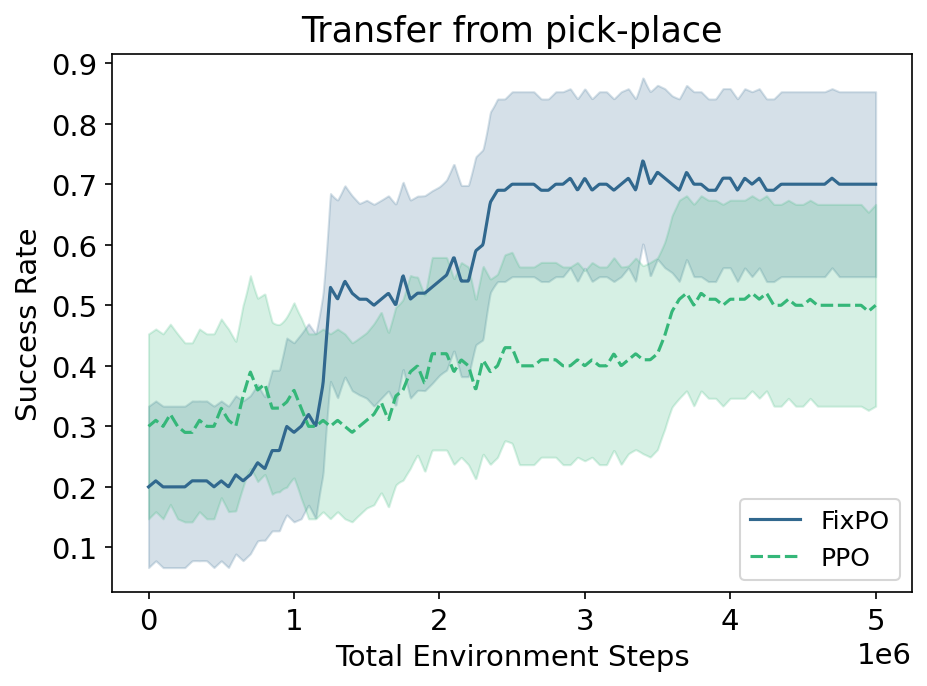

In [24]:
# sns.lineplot(data=pd.DataFrame.from_dict(pd_dict_forward), x="Total Environment Steps", y="Success Rate", hue='Algorithm', 
#              errorbar=('se', 1.0),)
sns.lineplot(
    data=pd.DataFrame.from_dict(pd_dict_forward),
    x="Total Environment Steps",
    y="Success Rate",
    hue="Algorithm",
    errorbar=('se', 1.0),
    style="Algorithm",
    palette="viridis",
)
plt.title("Transfer from pick-place")
plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()
plt.savefig(f"mt10_transfer_from_pick-place.pdf")

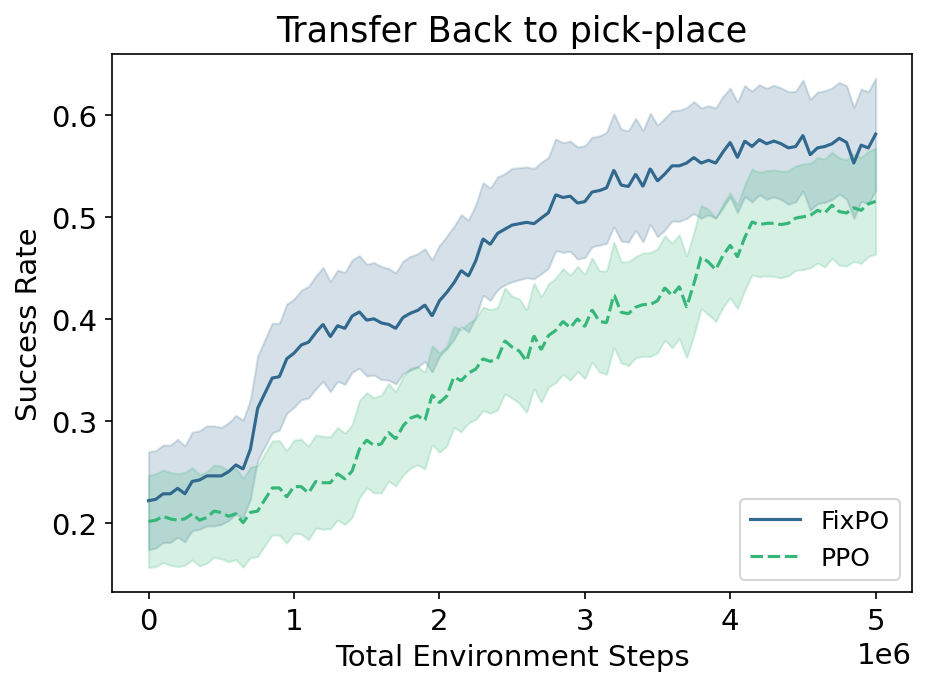

In [23]:
sns.lineplot(
    data=pd.DataFrame.from_dict(pd_dict_back),
    x="Total Environment Steps",
    y="Success Rate",
    hue="Algorithm",
    errorbar=('se', 1.0),
    style="Algorithm",
    palette="viridis",
)
plt.title("Transfer Back to pick-place")
plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()
plt.savefig(f"mt10_transfer_back_to_pick-place.pdf")

In [158]:
data_10m = pd.DataFrame.from_dict(pd_dict)

In [160]:
data_10m["Algorithm"] = data_10m["algo"]

In [161]:
algo_renames = {
    "kl-proj": "KL Proj.",
    "ppo": "PPO",
    "fixpo": "FixPO",
}
data_10m["Algorithm"] = [algo_renames[alg] for alg in data_10m["algo"]]
data_10m["Total Environment Steps"] = data_10m["Total Env Steps"]

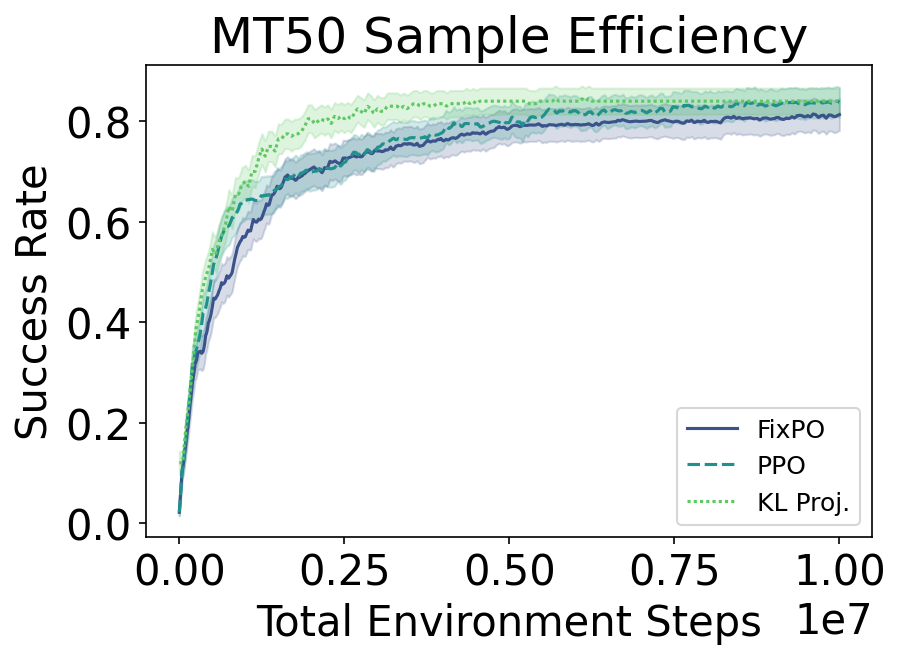

In [162]:
sns.lineplot(
    data=data_10m,
    x="Total Environment Steps",
    y="Success Rate",
    hue="Algorithm",
    errorbar=('se', 1.0),
    style="Algorithm",
    palette="viridis",
)
plt.title("MT50 Sample Efficiency")
plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()
plt.savefig(f"mt50_450runs_10m_steps.pdf")

In [130]:
run.summary

{'update/loss/kl': 0.07964432239532471, 'update/loss/vf': 0.2647915184497833, 'update/loss/beta': 0.220221683382988, 'test/success_rate': 0.10000000149011612, '_step': 8, '_wandb': {'runtime': 85}, 'global_step': 80000, 'update/loss': -2.6451401710510254, 'update/loss/ent': 3.631418228149414, 'update/fixup_grad_steps': 2.799999952316284, 'test/reward': 657.4105834960938, 'train/episode': 20, 'update/loss/pg': -2.7512636184692383, 'test/reward_std': 802.43359375, '_runtime': 83.28702473640442, '_timestamp': 1695624657.3212698, 'train/reward': 361.0486755371094, 'train/success_rate': 0, 'test/length_std': 0, 'test/length': 500, 'update/beta': 1.6431198120117188, 'train/length': 500, 'test/env_step': 80000}

In [140]:
res = runs[0].scan_history(keys=['_)

In [144]:
runs[0].history()['_timestamp']

0      1.695836e+09
1      1.695836e+09
2      1.695836e+09
3      1.695836e+09
4      1.695836e+09
           ...     
495    1.695875e+09
496    1.695875e+09
497    1.695875e+09
498    1.695875e+09
499    1.695875e+09
Name: _timestamp, Length: 500, dtype: float64